In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold,validation_curve
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

In [179]:
data=pd.read_csv(r"C:\Users\Avijit\Desktop\AgriAssure\AGRIYIELD PRO\PROCESSED_DATASET\yield4.csv")

In [180]:
x,y=data.iloc[:,:-1],data.iloc[:,-1:]

In [181]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,train_size=0.8)

In [116]:
def objective(trial):
       params = {
        'booster': trial.suggest_categorical("booster", ['gbtree', 'gblinear', 'dart']),
        'max_depth': trial.suggest_int("max_depth", 3, 8),
        'learning_rate': trial.suggest_float("learning_rate", 0.0001, 0.1, log=True),
        'n_estimators': trial.suggest_int("n_estimators", 50, 200),
        'subsample': trial.suggest_float("subsample", 0.5, 0.8),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 0.9),
        'colsample_bylevel': trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 10),
        'gamma': trial.suggest_float("gamma", 0, 5),
        'lambda': trial.suggest_float("lambda", 1e-3, 10.0, log=True),  
        'alpha': trial.suggest_float("alpha", 1e-3, 10.0, log=True),  
        'predictor': trial.suggest_categorical("predictor", ['auto', 'cpu_predictor', 'gpu_predictor']),
        'verbosity': 0
    }
       model=XGBRegressor(**params)
       score=cross_val_score(model,xtrain,ytrain,cv=3,scoring='r2')
       return score.mean()

In [191]:
study=optuna.create_study(
direction='maximize',
study_name='xgboost_study5',
storage=r'sqlite:///C:/Users/Avijit/Desktop/AgriAssure/AGRIYIELD PRO/RESULT/XGBOOST/xgboost_study5.db',
load_if_exists=True
)  

[I 2025-07-07 19:02:35,587] A new study created in RDB with name: xgboost_study5


In [192]:
study.optimize(objective,n_trials=30)

[I 2025-07-07 19:02:38,285] Trial 0 finished with value: 0.010290304819742838 and parameters: {'booster': 'gbtree', 'max_depth': 4, 'learning_rate': 0.0005691897895780357, 'n_estimators': 130, 'subsample': 0.729219500986025, 'colsample_bytree': 0.6642631596352397, 'colsample_bylevel': 0.5304580707951664, 'min_child_weight': 4, 'gamma': 3.47060152346488, 'lambda': 0.12418216366994753, 'alpha': 0.001982151827158619, 'predictor': 'cpu_predictor'}. Best is trial 0 with value: 0.010290304819742838.
[I 2025-07-07 19:02:43,708] Trial 1 finished with value: 0.17634485165278116 and parameters: {'booster': 'dart', 'max_depth': 8, 'learning_rate': 0.00569820082951083, 'n_estimators': 161, 'subsample': 0.7734503632107874, 'colsample_bytree': 0.5086200597332684, 'colsample_bylevel': 0.970579810910289, 'min_child_weight': 2, 'gamma': 4.355750353282024, 'lambda': 0.0037768043859006876, 'alpha': 0.002974994240348413, 'predictor': 'auto'}. Best is trial 1 with value: 0.17634485165278116.
[I 2025-07-07 

In [81]:
study=optuna.load_study(storage="sqlite:///C:/Users/Avijit/Desktop/AgriAssure/AGRIYIELD PRO/RESULT/XGBOOST/xgboost_study2.db",study_name='xgboost_study2')

In [193]:
study.best_params

{'booster': 'dart',
 'max_depth': 8,
 'learning_rate': 0.09756185540242374,
 'n_estimators': 146,
 'subsample': 0.6875058678660663,
 'colsample_bytree': 0.8733778458213806,
 'colsample_bylevel': 0.67648840203195,
 'min_child_weight': 9,
 'gamma': 1.5583326591991484,
 'lambda': 0.0010289311183871404,
 'alpha': 0.025443313454005287,
 'predictor': 'cpu_predictor'}

In [194]:
params=study.best_params

In [195]:
model=XGBRegressor(**params,tree_method='hist')
model.fit(xtrain,ytrain)
model.score(xtest,ytest)
# model.score(xtrain,ytrain)

c:\Users\Avijit\Desktop\AgriAssure\AGROENV\lib\site-packages\xgboost\training.py:183: UserWarning: [19:04:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.609260618686676

In [196]:
r2_score(ytest,model.predict(xtest)),r2_score(ytrain,model.predict(xtrain))

(0.609260618686676, 0.7591872215270996)

In [198]:
degrees=np.arange(1,21)
trainscore,valscore=validation_curve(
    model,X=xtrain,y=ytrain,param_name='max_depth',param_range=degrees,cv=5,scoring='r2'
)
trainmean=trainscore.mean(axis=1)
valmean=valscore.mean(axis=1)

c:\Users\Avijit\Desktop\AgriAssure\AGROENV\lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Avijit\Desktop\AgriAssure\AGROENV\lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Avijit\Desktop\AgriAssure\AGROENV\lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Avijit\Desktop\AgriAssure\AGROENV\lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "pred

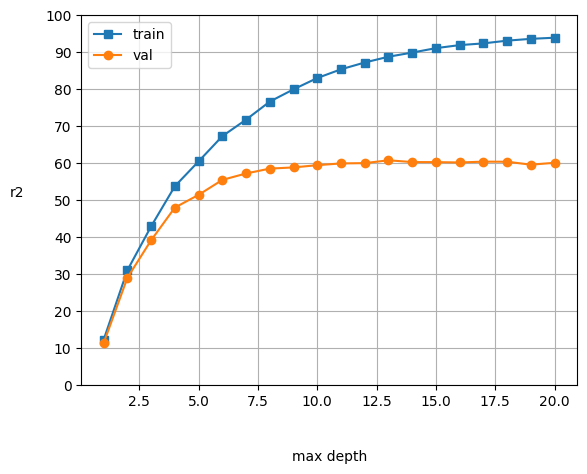

In [200]:
trainmean,valmean=trainscore.mean(axis=1),valscore.mean(axis=1)
degrees=np.arange(1,21)
plt.plot(degrees,trainmean*100,label='trainscore',marker='s')
plt.plot(degrees,valmean*100,label='valscore',marker='o')
plt.xlabel("max depth",labelpad=30)
plt.ylabel("r2",rotation=0,labelpad=20)
plt.yticks(range(0,101,10))
plt.grid()
plt.legend(['train','val'])
plt.show()

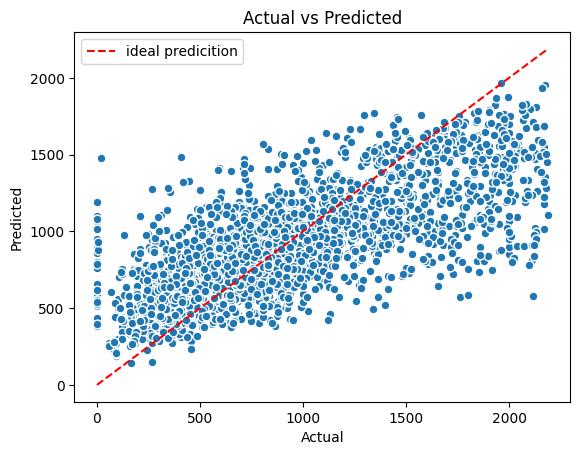

In [187]:
ypred=model.predict(xtest)
ymin=ytest.min()
ymax=ytest.max()
plt.scatter(ytest,ypred,edgecolors='white',s=40)
plt.plot([ymin,ymax],[ymin,ymax],'r--',label='ideal predicition')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

<BarContainer object of 3 artists>

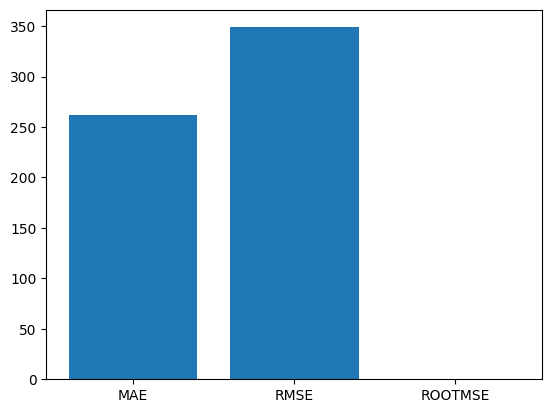

In [188]:
r2=r2_score(ytest,ypred)
mae=mean_absolute_error(ytest,ypred)
rootmse=root_mean_squared_error(ytest,ypred)
score=[mae,rootmse,r2]
metrics=['MAE',"RMSE","ROOTMSE"]
plt.bar(metrics,score)